# Import dependancies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Preprocessing

In [2]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [3]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [4]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Train test split scale compile fit

In [5]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 448       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
35/35 [==============================] - 0s 743us/step - loss: 506.3908 - accuracy: 0.8276
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 209.5015 - accuracy: 0.7069
Epoch 3/100
35/35 [==============================] - 0s 784us/step - loss: 94.2396 - accuracy: 0.7123
Epoch 4/100
35/35 [==============================] - 0s 714us/step - loss: 52.4957

35/35 [==============================] - 0s 714us/step - loss: 1.3115 - accuracy: 0.7849
Epoch 75/100
35/35 [==============================] - 0s 685us/step - loss: 1.4847 - accuracy: 0.7695
Epoch 76/100
35/35 [==============================] - 0s 685us/step - loss: 5.5981 - accuracy: 0.7359
Epoch 77/100
35/35 [==============================] - 0s 714us/step - loss: 1.8821 - accuracy: 0.7550
Epoch 78/100
35/35 [==============================] - 0s 657us/step - loss: 1.0830 - accuracy: 0.7858
Epoch 79/100
35/35 [==============================] - 0s 685us/step - loss: 2.0757 - accuracy: 0.7550
Epoch 80/100
35/35 [==============================] - 0s 714us/step - loss: 2.8040 - accuracy: 0.7641
Epoch 81/100
35/35 [==============================] - 0s 685us/step - loss: 2.5162 - accuracy: 0.7559
Epoch 82/100
35/35 [==============================] - 0s 685us/step - loss: 1.4718 - accuracy: 0.7831
Epoch 83/100
35/35 [==============================] - 0s 714us/step - loss: 1.3477 - accuracy: 

# Evaluate model

12/12 - 0s - loss: 0.5901 - accuracy: 0.8478
Loss: 0.5900736451148987, Accuracy: 0.8478260636329651


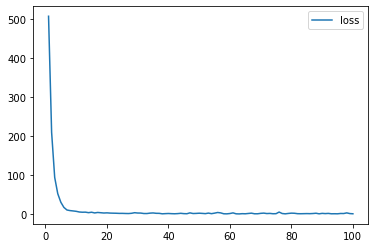

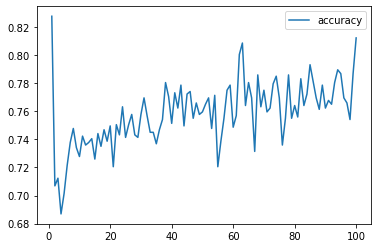

In [6]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
display(history_df.plot(y="loss"))

# Plot the accuracy
display(history_df.plot(y="accuracy"))

## Checkpoints
# Saving and Loading Node Weights

In [7]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [8]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=350
)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
35/35 [==============================] - 0s 825us/step - loss: 0.7721 - accuracy: 0.6397
Epoch 2/100
35/35 [==============================] - 0s 914us/step - loss: 0.5354 - accuracy: 0.7033
Epoch 3/100
35/35 [==============================] - 0s 828us/step - loss: 0.4407 - accuracy: 0.7822
Epoch 4/100
35/35 [==============================] - 0s 743us/step - loss: 0.4217 - accuracy: 0.8185
Epoch 5/100
35/35 [==============================] - 0s 714us/step - loss: 0.4127 - accuracy: 0.8203
Epoch 6/100
35/35 [==============================] - 0s 657us/step - loss: 0.4047 - accuracy: 0.8294
Epoch 7/100
35/35 [==============================] - 0s 714us/step - loss: 0.3976 - accuracy: 0.8403
Epoch 8/100
35/35 [==============================] - 0s 771us/step - loss: 0.3911 - accuracy: 0.8376
Epoch 9/100
35/35 [==============================] - 0s 800us/step - loss: 0.3834 - accuracy: 0.8494
Epoch 10/100
 1/35 [..............................] - ETA: 0s - loss: 0.4207 - accuracy: 0.

Epoch 72/100
35/35 [==============================] - 0s 771us/step - loss: 0.2416 - accuracy: 0.9020
Epoch 73/100
35/35 [==============================] - 0s 800us/step - loss: 0.2403 - accuracy: 0.9020
Epoch 74/100
35/35 [==============================] - 0s 714us/step - loss: 0.2397 - accuracy: 0.9011
Epoch 75/100
35/35 [==============================] - 0s 914us/step - loss: 0.2379 - accuracy: 0.9038
Epoch 76/100
35/35 [==============================] - 0s 685us/step - loss: 0.2375 - accuracy: 0.9002
Epoch 77/100
35/35 [==============================] - 0s 657us/step - loss: 0.2375 - accuracy: 0.9020
Epoch 78/100
35/35 [==============================] - 0s 714us/step - loss: 0.2362 - accuracy: 0.8984
Epoch 79/100
35/35 [==============================] - 0s 657us/step - loss: 0.2376 - accuracy: 0.8975
Epoch 80/100
 1/35 [..............................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8750
Epoch 00080: saving model to checkpoints\weights.80.hdf5
35/35 [========================

In [9]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.2888 - accuracy: 0.8940
Loss: 0.2888224720954895, Accuracy: 0.89402174949646


# Saving and Loading Full Models

In [10]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.2888 - accuracy: 0.8940
Loss: 0.2888224720954895, Accuracy: 0.89402174949646


In [16]:
len(X[0])

55